# TP 03

In [29]:
from matplotlib import pyplot as plt, image
import copy
import skimage
from skimage import util
from skimage import io
from skimage.util import random_noise
import cv2
import numpy as np
import warnings
import scipy.ndimage as ndi
from scipy import ndimage
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [30]:
warnings.filterwarnings('ignore')

## TF de l'image de Cameraman

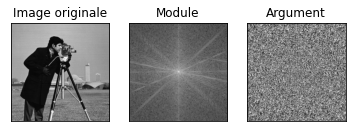

In [31]:
img_cameraman = cv2.imread('./cameraman.jpg', 0)

# Caculer la transformer de Fourier de l'image
f = np.fft.fft2(img_cameraman)

# Déplacer la composante de fréquence zéro vers le centre
fshift = np.fft.fftshift(f)

# Calculer le spectre de magnitude
magnitude_spectrum_camera = 20*np.log(np.abs(fshift))

# Calculer le spectre de phase
phase_img_camera = np.angle(fshift)

# Affichage de l'image originale
plt.subplot(131),plt.imshow(img_cameraman, cmap = 'gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

# Affichage du module
plt.subplot(132),plt.imshow(magnitude_spectrum_camera, cmap = 'gray')
plt.title('Module'), plt.xticks([]), plt.yticks([])

# Affichage de l'argument
plt.subplot(133),plt.imshow(phase_img_camera, cmap = 'gray')
plt.title('Argument'), plt.xticks([]), plt.yticks([])
plt.show()

## TF de l'image de Trui

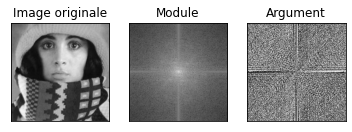

In [32]:
img_trui = cv2.imread('./trui.png', 0)

# Caculer la transformer de Fourier de l'image
f = np.fft.fft2(img_trui)

# Déplacer la composante de fréquence zéro vers le centre
fshift = np.fft.fftshift(f)

# Calculer le spectre de magnitude
magnitude_spectrum_trui = 20*np.log(np.abs(fshift))

# Calculer le spectre de phase
phase_img_trui = np.angle(fshift)

# Affichage de l'image originale
plt.subplot(131),plt.imshow(img_trui, cmap = 'gray')
plt.title('Image originale'), plt.xticks([]), plt.yticks([])

# Affichage du module
plt.subplot(132),plt.imshow(magnitude_spectrum_trui, cmap = 'gray')
plt.title('Module'), plt.xticks([]), plt.yticks([])

# Affichage de l'argument
plt.subplot(133),plt.imshow(phase_img_trui, cmap = 'gray')
plt.title('Argument'), plt.xticks([]), plt.yticks([])
plt.show()

## Reconstitution d'une image à partir de trui et cameraman

(Text(0.5, 1.0, 'Image reconstituée'), ([], []), ([], []))

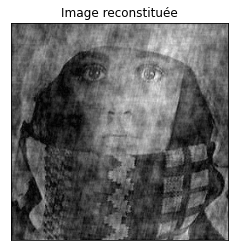

In [33]:
# Multiplication des spectres de magnitude et de phase des images "camera" et "trui", respectivement
# Cette multiplication est effectuée en convertissant le spectre de phase en nombres complexes et en multipliant ce nombre complexe avec le spectre de magnitude
# make the phase and magnitude the same size
matrice_ = np.multiply(np.exp(magnitude_spectrum_camera/20),np.exp(phase_img_trui*1j))

# Calculer la transformée de Fourier inverse de la matrice résultante, qui est une matrice complexe
matrice_inverse=np.fft.ifft2(matrice_)

# La fonction np.abs() est utilisée pour calculer la valeur absolue de la matrice résultante
matrice__=np.abs(matrice_inverse)

# Le résultat final est une image combinant les caractéristiques de l'image "camera" et "trui"
plt.subplot(111),plt.imshow(matrice__, cmap = 'gray')
plt.title('Image reconstituée'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Image reconstituée'), ([], []), ([], []))

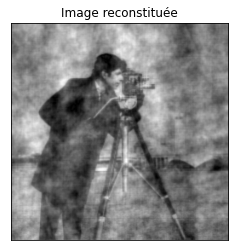

In [34]:
matrice_ = np.multiply(np.exp(magnitude_spectrum_trui/20),np.exp(phase_img_camera*1j))

# Calculer la transformée de Fourier inverse de la matrice résultante, qui est une matrice complexe
matrice_inverse=np.fft.ifft2(matrice_)

# La fonction np.abs() est utilisée pour calculer la valeur absolue de la matrice résultante
matrice__=np.abs(matrice_inverse)

# Le résultat final est une image combinant les caractéristiques de l'image "camera" et "trui"
plt.subplot(111),plt.imshow(matrice__, cmap = 'gray')
plt.title('Image reconstituée'), plt.xticks([]), plt.yticks([])

## Filtre pass-bas dans le domaine fréquentiel

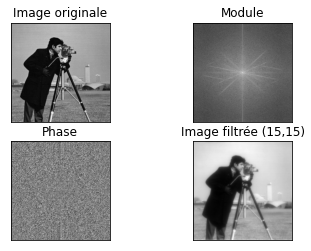

In [22]:
f = np.fft.fft2(img_cameraman)
fshift = np.fft.fftshift(f)
magnitude_spectrum_camera = 20 * np.log(np.abs(fshift))
phase_img_camera = np.angle(fshift)

# Définir la fréquence de coupure
U0 = 15
V0 = 15

# Génération d'une meshgrid qui a la meme taille que la TF du l'image
M, N = fshift.shape
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))

# Génération d'un filtre pass-bas
D = np.sqrt((u/U0)**2 + (v/V0)**2)
H = 1.0 / (1.0 + D)

# Application du filtre pass-bas à l'image
G = H * fshift
g = np.fft.ifftshift(G)
filtered_img = np.abs(np.fft.ifft2(g))

# Affichage des images
plt.subplot(221), plt.imshow(img_cameraman, cmap='gray')
plt.title('Image originale')
plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(magnitude_spectrum_camera, cmap='gray')
plt.title('Module')
plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(phase_img_camera, cmap='gray')
plt.title('Phase')
plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(filtered_img, cmap='gray')
plt.title('Image filtrée (15,15)')
plt.xticks([]), plt.yticks([])
plt.show()

## Filtre pass-haut dans le domaine fréquentiel

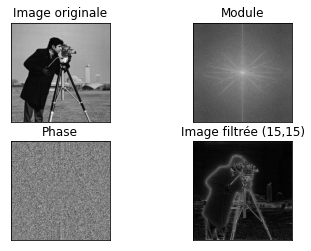

In [23]:
f = np.fft.fft2(img_cameraman)
fshift = np.fft.fftshift(f)
magnitude_spectrum_camera = 20 * np.log(np.abs(fshift))
phase_img_camera = np.angle(fshift)

# Définir la fréquence de coupure
U0 = 15
V0 = 15

# Génération d'une meshgrid qui a la meme taille que la TF du l'image
M, N = fshift.shape
u, v = np.meshgrid(np.arange(-N/2, N/2), np.arange(-M/2, M/2))

# Génération d'un filtre passe-haut
D = np.sqrt((u/U0)**2 + (v/V0)**2)
H = 1.0 - 1.0 / (1.0 + D)

# Application du filtre pass-bas à l'image
G = H * fshift
g = np.fft.ifftshift(G)
filtered_img = np.abs(np.fft.ifft2(g))

# Affichage des images
plt.subplot(221), plt.imshow(img_cameraman, cmap='gray')
plt.title('Image originale')
plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(magnitude_spectrum_camera, cmap='gray')
plt.title('Module')
plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(phase_img_camera, cmap='gray')
plt.title('Phase')
plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(filtered_img, cmap='gray')
plt.title('Image filtrée (15,15)')
plt.xticks([]), plt.yticks([])
plt.show()

## Histogramme de l'image cameraman

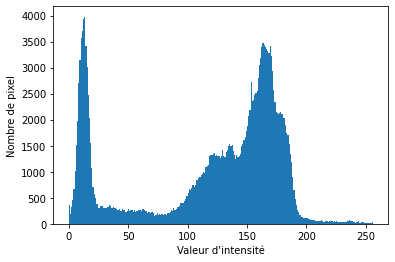

In [24]:
plt.hist(img_cameraman.ravel(), 256, [0, 256])
plt.xlabel("Valeur d'intensité")
plt.ylabel('Nombre de pixel')
plt.show()

## Translation de l'histogramme

In [25]:
nouvelle_image = np.copy(img_cameraman)

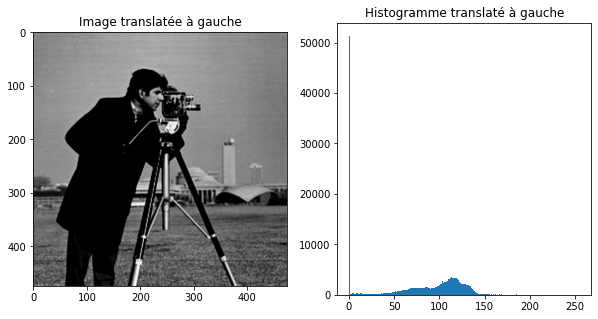

In [26]:
# Translation à gauche
shift = 50
nouvelle_image = (nouvelle_image.astype('int16') - shift).clip(0, 255).astype('uint8')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.imshow(nouvelle_image, cmap='gray')
ax1.set_title('Image translatée à gauche')
ax2.hist(nouvelle_image.ravel(), bins=256, range=(0, 255))
ax2.set_title('Histogramme translaté à gauche')
plt.show()

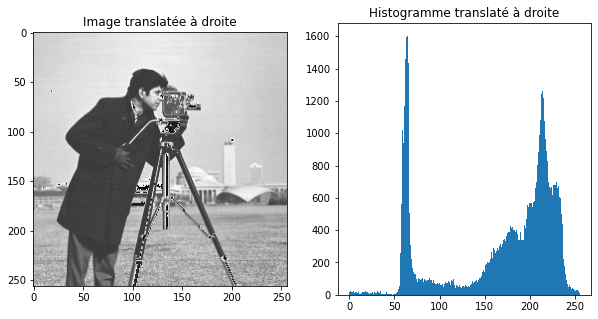

In [33]:
# Translation à droite
nouvelle_image = nouvelle_image + 100

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax1.imshow(nouvelle_image, cmap='gray')
ax1.set_title('Image translatée à droite')
ax2.hist(nouvelle_image.ravel(), bins=256, range=(0, 255))
ax2.set_title('Histogramme translaté à droite')
plt.show()

## Égalisation de l'histogramme de l'image thumb_pout

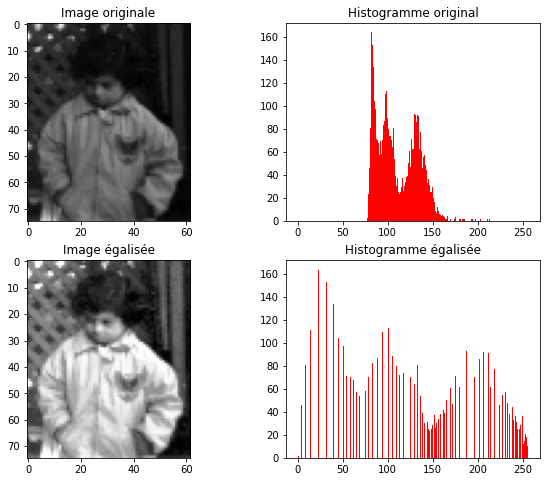

In [28]:
img = cv2.imread('thumb_pout.png', 0)

# Application de l'égalisation de l'histogramme
img_eq = cv2.equalizeHist(img)

# Affichage
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Image originale')

axs[0, 1].hist(img.ravel(), 256, [0, 256], color='r')
axs[0, 1].set_title('Histogramme original')

axs[1, 0].imshow(img_eq, cmap='gray')
axs[1, 0].set_title('Image égalisée')

axs[1, 1].hist(img_eq.ravel(), 256, [0, 256], color='r')
axs[1, 1].set_title('Histogramme égalisée')

plt.show()